## <center>Выявление лучших рынков для инвестиций в рекламу: Исследование датасета New Coder Survey</center>
                                                              Проект выполнен: Резвухин Д.И., май 2022 г.
### Введение

В рамках реализации данного проекта предположим, что мы являемся сотрудниками гипотетической компании, специализирующейся на онлайн-обучении и предлагающей платные курсы по программированию. Большинство актуальных курсов на нашей платформе посвящены веб- и мобильной разработке, но также охватывают и многие другие области, такие как наука о данных, разработка игр и т.д. Мы заинтересованы в продвижении нашего продукта и хотели бы вложить немного денег в рекламу. Цель данного проекта заключается в том, чтобы выявить два подходящих рынка для инвестирования в рекламу продуктов и услуг. Нужно учесть, что стоимость подписки на обучающий контент на нашей платформе составляет 59$ в месяц.

В реальности, для достижения такой цели можно организовать опросы начинающих программистов в рамках нескольких рыночных ниш, чтобы выяснить, какие из этих ниш лучше всего подходят для рекламы. Однако это достаточно дорого и трудозатратно, поэтому имеет смысл сначала рассмотривать более доступные варианты.

Так, мы можем попробовать найти датасеты, которые содержат нужные данные. Одним из подходящих кандидатов является датасет, содержащий данные опроса [New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), проведенного freeCodeCamp в 2017 году. freeCodeCamp — это бесплатная платформа для онлайн-обучения, предлагающая курсы по веб-разработке. Поскольку этой компании принадлежит популярное издание Medium (более 400 000 подписчиков), то опрос привлек множество программистов с различными интересами (не только в области веб-разработки), что идеально подходит для целей нашего анализа.

Данные опроса находятся в открытом доступе в [этом репозитории на GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey).

### 1. Импортирование библиотек и знакомство с датасетом

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# улучшим качество графиков, переведя их в векторный формат svg
import matplotlib_inline.backend_inline  
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')  

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


Сразу отметим, что датасет опроса содержит множество столбцов (136). Вероятнее всего, какие-то из них гораздо более полезны для целей нашего анализа, чем другие. Далее постараемся выяснить, какие из всего многообразия столбцов наиболее важные. Словарь для датасета доступен в папке `raw-data` в репозитории на GitHub.

Чтобы определить, в какой рынок лучше всего инвестировать, нужно получить ответы на вопросы о генеральной совокупности начинающих программистов, которые заинтересованы в тех обучающих программах, которые мы предлагаем. Так, нужно знать следующую информацию:

* В каких странах много начинающих программистов?
* Сколько денег новички готовы потратить на обучение программированию?

### 2. Подходит ли выборка?

Перед тем, как приступить непосредственно к анализу, необходимо убедиться, что имеющаяся в наличии выборка является репрезентативной по отношению к генеральной совокупности начинающих программистов и содержит подходящие категории кодеров.

Для этого подробнее рассмотрим столбец `JobRoleInterest`, в котором приведены ответы респондентов о желаемой специализации в будущей профессиональной деятельности.

In [3]:
jobs = survey['JobRoleInterest'].value_counts(normalize=True, dropna=False) * 100
jobs

NaN                                                                                                                                                                                                                                                                                         61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                                     4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                                    2.475928
  Data Scientist                                                                                                      

К сожалению, в этом столбце более половины значений (62%) пропущено. Чтобы убедиться, что мы работаем с репрезентативной выборкой, нам нужно удалить из датафрейма все ряды, в которых участники не ответили, какая специализация в работе им интересна. Если участник пропустил ответ на этот вопрос, мы не обладаем информацией о его интересах, и будет лучше, если такая категория респондентов не будет учитываться. Удалим ряды с пропущенными значениями в столбце `JobRoleInterest`:

In [4]:
survey.dropna(subset=['JobRoleInterest'], inplace=True)
jobs = survey['JobRoleInterest'].value_counts(normalize=True) * 100
jobs

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

Данный столбец содержит множество уникальных значений. В частности, это связано с тем, что ответы могли включать несколько специализаций, поэтому наблюдаются самые разные комбинации. Визуализируем частоту встречаемости первых 20 ответов по популярности:


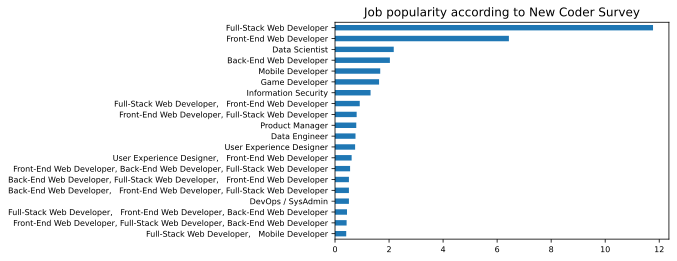

In [5]:
jobs.iloc[:20].plot.barh(fontsize=8).invert_yaxis()
plt.title('Job popularity according to New Coder Survey')
plt.show()

Как уже указывалось, большинство актуальных курсов на нашей гипотетической платформе посвящены веб- и мобильной разработке, поэтому это наиболее перспективная ниша. Посмотрим, какое количество людей заинтересовано хотя бы в одной из этих дисциплин:

In [6]:
web_mobile_interest = survey['JobRoleInterest'].str.contains('Web|Mobile').sum()
print('Number of interested in Web or Mobile:', web_mobile_interest)
print('Proportion of novice programmers interested in Web or Mobile:', 
        web_mobile_interest / len(survey))

Number of interested in Web or Mobile: 6034
Proportion of novice programmers interested in Web or Mobile: 0.8629862700228833


86 процентов всех респондентов, давших ответ на вопрос о желаемой сфере работы, указали веб- или мобильную разработку. Это свидетельствует о том, что данный датасет хорошо подходит для наших целей, так как включает множество программистов, потенциально заинтересованных в наших продуктах.

### 3. Выберем страны для инвестиций

Теперь, когда мы убедились, что выборка подходит для цели нашего исследования, можно начать непосредственно анализ. Сперва мы можем определить страны проживания программистов, а также выявить, как много программистов, прошедших опрос, проживает в той или иной стране. 

Для выполнения данной задачи потенциально подходят два столбца. Так, столбец `CountryCitizen` отображает информацию о месте рождения, в то время как в столбце `CountryLive` содержится информация о стране проживания. Мы акцентируем внимание на втором столбце, так как нас в первую очередь интересует место проживания людей во время запуска рекламной кампании.

Поскольку датасет содержит информацию на уровне стран, мы фактически можем считать каждую страну отдельным рынком. Таким образом, мы можем в качестве двух целевых рынков выбрать две страны.

Одним из показателей хорошего рынка является количество потенциальных клиентов — чем больше таких клиентов в целевой рыночной нише, тем лучше. Например, если нашей рекламе удастся убедить 10% из 5000 потенциальных клиентов на рынке А купить подписку на обучающий контент, то это лучше, чем убедить 100% из 30 потенциальных клиентов на рынке Б.

Построим таблицу частот для столбца `CountryLive`:

In [7]:
countries = survey['CountryLive'].value_counts(normalize=True)
countries.head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

С большим отрывом лидирует США (почти половина респондентов), в тройке лидеров также Индия и Великобритания.

Это полезная информация, однако нужно провести более подробный анализ, прежде чем принимать решение. В частности, можно выяснить, сколько денег новые кодеры готовы потратить на обучение. По условиям проекта, наша компания продает подписки по цене 59 долларов в месяц. По этой причине мы заинтересованы в том, чтобы узнать, сколько денег на обучение тратят потенциальные студенты в такой временной интервал. Реклама на рынках, где большинство людей готовы учиться только бесплатно, не будет хорошей инвестицией.

Также представляется хорошей идеей сузить наш анализ только до четырех стран: США, Индии, Великобритании и Канады. Причин для такого решения две:

* Эти страны имеют наибольшую частоту встречаемости в нашей выборке, что означает, что в датасете есть приличный объем данных по каждой из них.
* Наши курсы написаны на английском языке, а английский является официальным языком во всех этих четырех странах. Чем больше людей знают английский язык, тем больше шансов, что наша реклама будет адресована нужной группе людей.

Столбец `MoneyForLearning` содержит информацию о том, сколько денег (в долларах) потратили участники опроса с момента, когда они начали программировать, и до момента прохождения опроса. Чтобы выявить, какое количество денег респонденты тратят на обучение в месяц, нужно разделить данные в столбце `MoneyForLearning` на данные в столбце `MonthsProgramming`. Некоторые участники опроса поставили в этом столбце значение 0, что может означать, что они только начали свой путь в программировании. Эти значения нужно заменить на единицу, чтобы не получилось деления на ноль. 

In [8]:
survey['MonthsProgramming'].replace(0, 1, inplace=True)
survey['MoneyPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']
survey['MoneyPerMonth'].value_counts(dropna=False).head(10)

0.000000      3092
NaN            675
50.000000      128
25.000000      120
16.666667      118
100.000000     118
33.333333      109
8.333333       105
20.000000       88
10.000000       83
Name: MoneyPerMonth, dtype: int64

Далее нам нужно удалить ряды с пропущенными значениями в столбцах `MoneyPerMonth` и `CountryLive`, так как, к сожалению, мы не можем использовать в анализе ответы от респондентов, которые не указали эту важную информацию. 

In [9]:
survey.dropna(subset=['MoneyPerMonth', 'CountryLive'], inplace=True)
survey['MoneyPerMonth'].value_counts(dropna=False).head(10)

0.000000      3040
50.000000      123
25.000000      119
16.666667      117
100.000000     117
33.333333      107
8.333333       104
20.000000       85
10.000000       79
83.333333       79
Name: MoneyPerMonth, dtype: int64

Наконец, мы можем посмотреть, сколько в среднем тратили на обучение начинающие программисты из США, Великобритании, Индии и Канады:

In [10]:
by_country = survey.groupby('CountryLive')['MoneyPerMonth'].mean()
by_country[['United States of America', 'India', 'United Kingdom', 'Canada']].round(1)

CountryLive
United States of America    228.0
India                       135.1
United Kingdom               45.5
Canada                      113.5
Name: MoneyPerMonth, dtype: float64

Любопытно, что суммы для Великобритании и Канады на удивление низкие по сравнению со значениями, которые наблюдаются для Индии. Если рассмотреть несколько социально-экономических показателей (например, ВВП на душу населения), то ожидается, что жители Великобритании и Канады будут тратить на обучение больше, чем жители Индии.

Можно предположить, что здесь мы имеем дело с некоторыми выбросами (в том числе и из-за некорректных ответов на опрос), что делает среднее значение слишком большим для Индии или слишком низким для Великобритании и Канады. Или может оказаться, что результаты полностью корректны. Для того, чтобы разобраться, построим несколько боксплотов для соответствующих распределений.

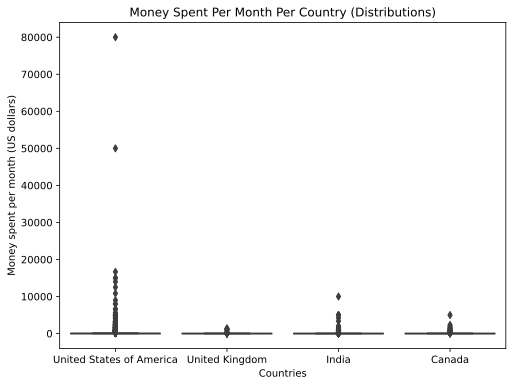

In [11]:
survey_four = survey[survey['CountryLive'].isin([
    'United States of America', 
    'India', 
    'United Kingdom', 
    'Canada'
])]

plt.figure(figsize = (8,6))
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=survey_four)
plt.title('Money Spent Per Month Per Country (Distributions)')
plt.xlabel('Countries')
plt.ylabel('Money spent per month (US dollars)')
plt.show()

Любопытно, что очень большие по значению выбросы есть только в случае распределения ответов респондентов из США. Якобы кто-то из проживающих в США тратит в месяц на обучение 50000 и 80000 долларов. Даже если это правда, это очень большие по значению выбросы, которые никак не помогут для целей нашего анализа, а только сильно уведут в сторону среднее значение. Поэтому уберем из рассмотрения эти точки и вновь построим боксплоты.

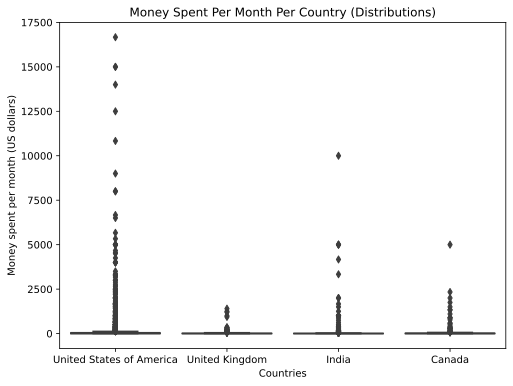

In [12]:
survey_four = survey_four[survey_four['MoneyPerMonth'] < 20000]

plt.figure(figsize = (8,6))
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=survey_four)
plt.title('Money Spent Per Month Per Country (Distributions)')
plt.xlabel('Countries')
plt.ylabel('Money spent per month (US dollars)')
plt.show()

Здесь ситуация становится уже более понятной. В целом, из распределений следует, что большинство студентов учились либо бесплатно, либо тратили относительно небольшие суммы. Далее можно поступить по-разному. Использовать медиану не имеет смысла, так как для каждого распределения она будет равна нулю (учившихся бесплатно более половины). Продолжим работу со средними. Будет полезно еще немного почистить датасет от выбросов. Мы удалим данные, соответствующие более чем 6000 долларов в месяц для жителей США (это позволит убрать около 10 точек с экстремальными значениями) и более 3000 долларов в месяц для жителей остальных рассматриваемых стран. Можно предположить, что в такую категорию входят программисты, посетившие обучающий буткэмп (полезное, но дорогостоящее и достаточно редкое явление, за которое респонденты заплятят в лучшем случае только 1-2 раза), либо указавшие ошибочную информацию. В любом случае, удалив такие выбросы, мы лучше ограничим нашу целевую аудиторию. 

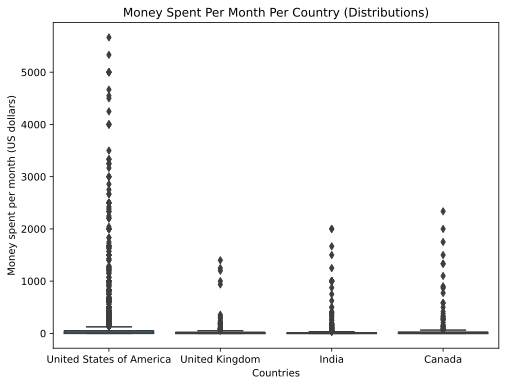

In [13]:
survey_four = survey_four[survey_four['MoneyPerMonth'] < 6000]
survey_four = survey_four[~((survey_four['MoneyPerMonth'] > 3000) 
                          & (survey_four['CountryLive'].isin(['India', 'Canada'])))]

plt.figure(figsize=(8,6))
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=survey_four)
plt.title('Money Spent Per Month Per Country (Distributions)')
plt.xlabel('Countries')
plt.ylabel('Money spent per month (US dollars)')
plt.show()                            

Для наглядности и разнообразия можно также построить графики кумулятивных функций распределения (CDF).

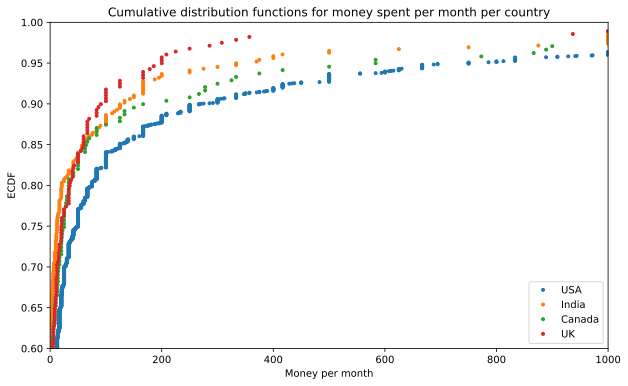

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

x_USA, y_USA = ecdf(survey_four.loc[survey_four['CountryLive'] == 'United States of America', 'MoneyPerMonth'])
x_India, y_India = ecdf(survey_four.loc[survey_four['CountryLive'] == 'India', 'MoneyPerMonth'])            
x_Canada, y_Canada = ecdf(survey_four.loc[survey_four['CountryLive'] == 'Canada', 'MoneyPerMonth'])
x_UK, y_UK = ecdf(survey_four.loc[survey_four['CountryLive'] == 'United Kingdom', 'MoneyPerMonth'])
 
plt.figure(figsize = (10,6))    
    
plt.plot(x_USA, y_USA, marker='.', linestyle='none', label='USA')
plt.plot(x_India, y_India, marker='.', linestyle='none', label='India')
plt.plot(x_Canada, y_Canada, marker='.', linestyle='none', label='Canada')
plt.plot(x_UK, y_UK, marker='.', linestyle='none', label='UK')

plt.xlim(0, 1000)
plt.ylim(0.6, 1.0)

plt.title('Cumulative distribution functions for money spent per month per country')
plt.xlabel('Money per month')
plt.ylabel('ECDF')
plt.legend()
plt.show()

Для более удобного восприятия, ограничим оси по значениям. Например, ось Х ограничена сверху отметкой 1000 долларов. Из этого графика видно, что платить в месяц сумму, примерно соответствующую стоимости подписки на наш контент (59$), готов каждый пятый-десятый участник опроса (зависит от страны), по-крайней мере, из числа тех, кто указал необходимые сведения в соответствующих столбцах (таких как страна проживания, интересующая специальность и сумма трат в месяц).

После чистки данных от выбросов, еще раз посчитаем среднюю сумму, которые тратят начинающие программисты в каждой из стран в месяц.

In [15]:
by_country = survey_four.groupby('CountryLive')['MoneyPerMonth'].mean()
by_country

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

Имеет смыcл здесь также сразу же учесть число респондентов из каждой страны:

In [16]:
survey_four['CountryLive'].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

Таким образом, однозначным первым выбором будет рынок США, так как, во-первых, там новички готовы тратить максимальную из четырех вариантов сумму, а во-вторых, имеют самое большое по численности сообщество. Выбор второй страны не так очевиден, однако можно предположить, что инвестиция в рынок Индии будет хорошим вариантом. Там сильно развито сообщество начинающих программистов (в датасете программистов из Индии почти столько же, сколько из Великобритании и Канады, вместе взятых), при этом многие индусы готовы покупать платные подписки за сумму, сравнимую с той, которую готовы платить жители UK и Канады.

### Заключение 

В данном исследовании был проведен анализ данных для гипотетической ситуации по решению следующего вопроса: в IT-рынок каких стран имеет смысл инвестировать деньги в рекламу обучающих курсов? Было установлено, что однозначно стоит инвестировать в рекламу на рынке США. Второй кандидат не так очевиден, однако предполагается, что удачным вариантом будет Индия на основе данных по количеству программистов из этой страны, а также сумм, которые они готовы тратить на обучение.

На данном этапе такую информацию уже можно передать в маркетинговый отдел, где будет принято окончательное решение. Так, одним из вариантов может быть и диверсификация оставшейся части расходов, т.е. их разделение на Индию, Канаду и Великобританию пропорционально численности программистов.